**IMPORTING REQUIRED PACKAGES**

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

**UPLOADING THE DATASET**

---





In [ ]:
df=pd.read_csv('/content/train-chennai-sale (1).csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**DATA CLEANING**

---







In [ ]:
df.shape

(7109, 22)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

There are missing values in the column N_BEDROOM,N_BATHROOM,QS_OVERALL

IMPUTTING & CHANGING THE DATA TYPES.

In [ ]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace = True)

In [ ]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace = True)

In [ ]:
df['QS_OVERALL'].fillna(df['QS_OVERALL'].median(), inplace = True)

In [ ]:
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)

Missing values are replaced with mode for two csategorical data and with median for numerical data.

In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Dropping unwanted columns



In [ ]:
df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1,inplace=True)

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

DATE_SALE,DATE_BUILD are the columns which contains the property sold/built date's.

As we can observe the data type of the elements in those columns are 'object' So it's necessary to convert those two columns into the type 'datetime64' type

In [ ]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')

In [ ]:
df['AGE_build'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

Creating a new column in the name of AGE_building

Because this age column will show how much old is the building ,this may have correlation with price of the building

In [ ]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


Checking spelling of the categorical data.

Found each columns having some spelling mistakes..need to be corrected.

In [ ]:
df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar',],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],  'T Nagar', inplace = True)
df['SALE_COND'].replace(['Ab Normal'],'AbNormal',inplace=True)
df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace=True)
df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)
df['BUILDTYPE'].replace(['Others'],'Other',inplace=True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)
df['UTILITY_AVAIL'].replace('AllPub','All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr','NoSewr ','Nosewr','NoSeWa'],'NoSewa',inplace=True)
df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [ ]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'NoSewa']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


Checking for the outliers in numerical columns

**Exploratory data analysis**

---



In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_build
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


Visualisation of categorical data

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

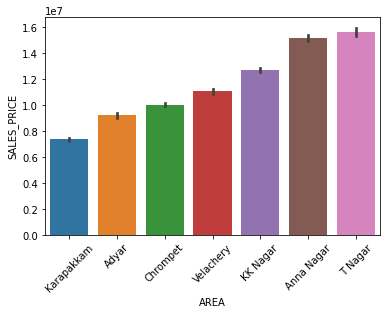

In [ ]:
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

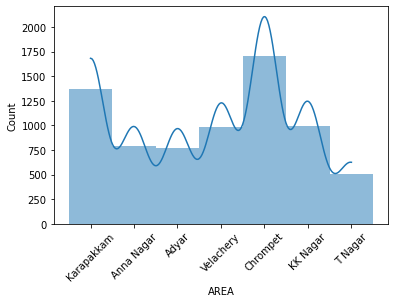

In [ ]:
sns.histplot(df.AREA, linewidth=0,kde=True)
plt.xticks(rotation=45)

INSIGHTS:-

By sorting Areas according to the sales price, we can able to see the linear relationship between them(when area changes price also changing),so by this we can preserve the order and label encoding can be done accordingly.

More building where sold in chrompet area because of the cost is in medium range.

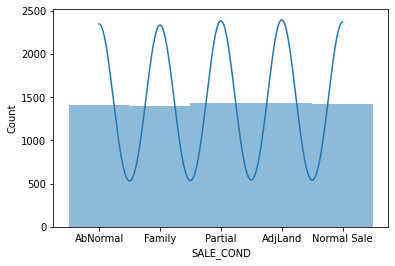

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

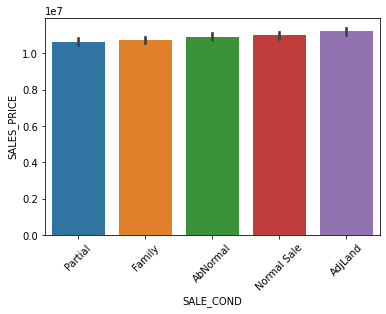

In [ ]:
sns.histplot(df.SALE_COND, linewidth=0,kde=True)
plt.show()
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.xticks(rotation=45)

Insights:-

Plots are found to be uniformly distributed.

There is no linear relationship between sales_cond and sales_price.So we can drop this column.

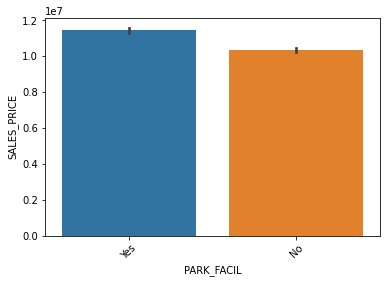

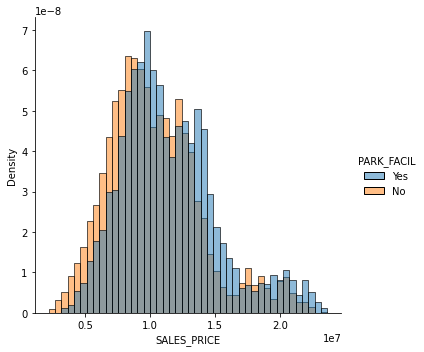

In [ ]:
sns.barplot(x = 'PARK_FACIL',y = 'SALES_PRICE',data = df)
plt.xticks(rotation=45)
plt.show()
sns.displot(df, x="SALES_PRICE", hue="PARK_FACIL", stat="density")
plt.show()

Insights:-

Cost of building increases with having parking facilities.
So there is a strong linear relation between this.

We can preserve the order and label encoding can be done.

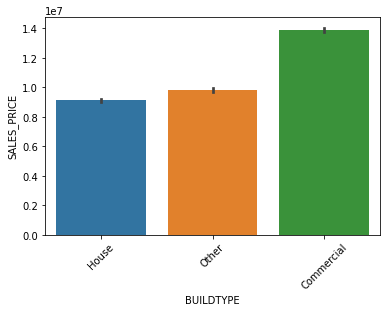

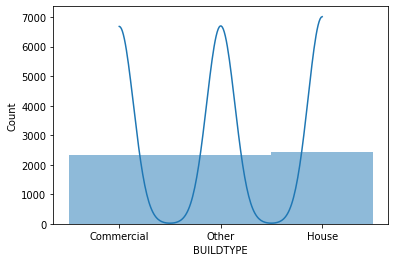

In [ ]:
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=45)
plt.show()
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)

INSIGHTS:-

In buildtype when we sort column in respect of sales_price we didn't find linear relation in this categorical feature but it may be important for us so we will keep it and do OneHotEncoding on this column data

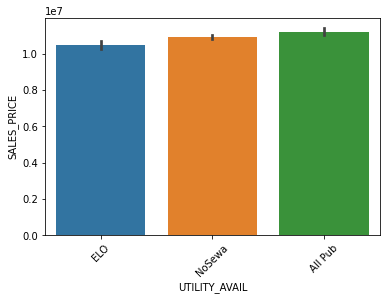

In [ ]:
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=45)
plt.show()


In utility_avail when we sort column in respect of sales_price we find good linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

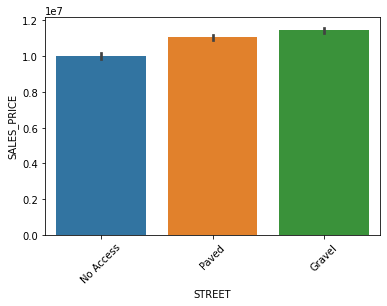

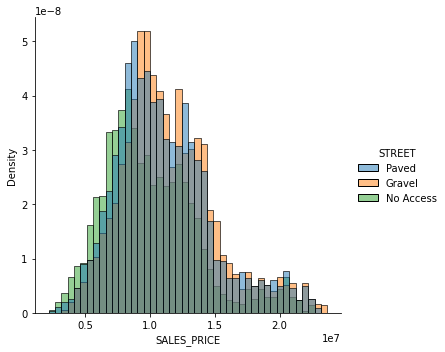

In [ ]:
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=45)
sns.displot(df, x="SALES_PRICE", hue="STREET", stat="density")
plt.show()

In street when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

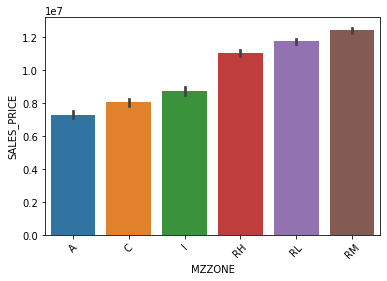

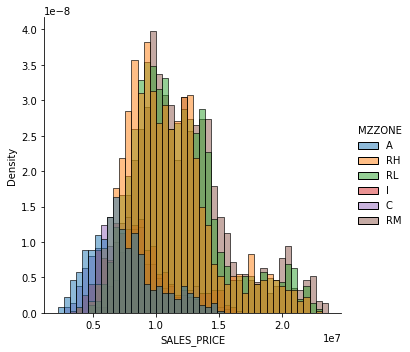

In [ ]:
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=45)
sns.displot(df, x="SALES_PRICE", hue="MZZONE", stat="density")
plt.show()

In mzzone when we sort column in respect of SALES_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order

Visualisation of continuous data

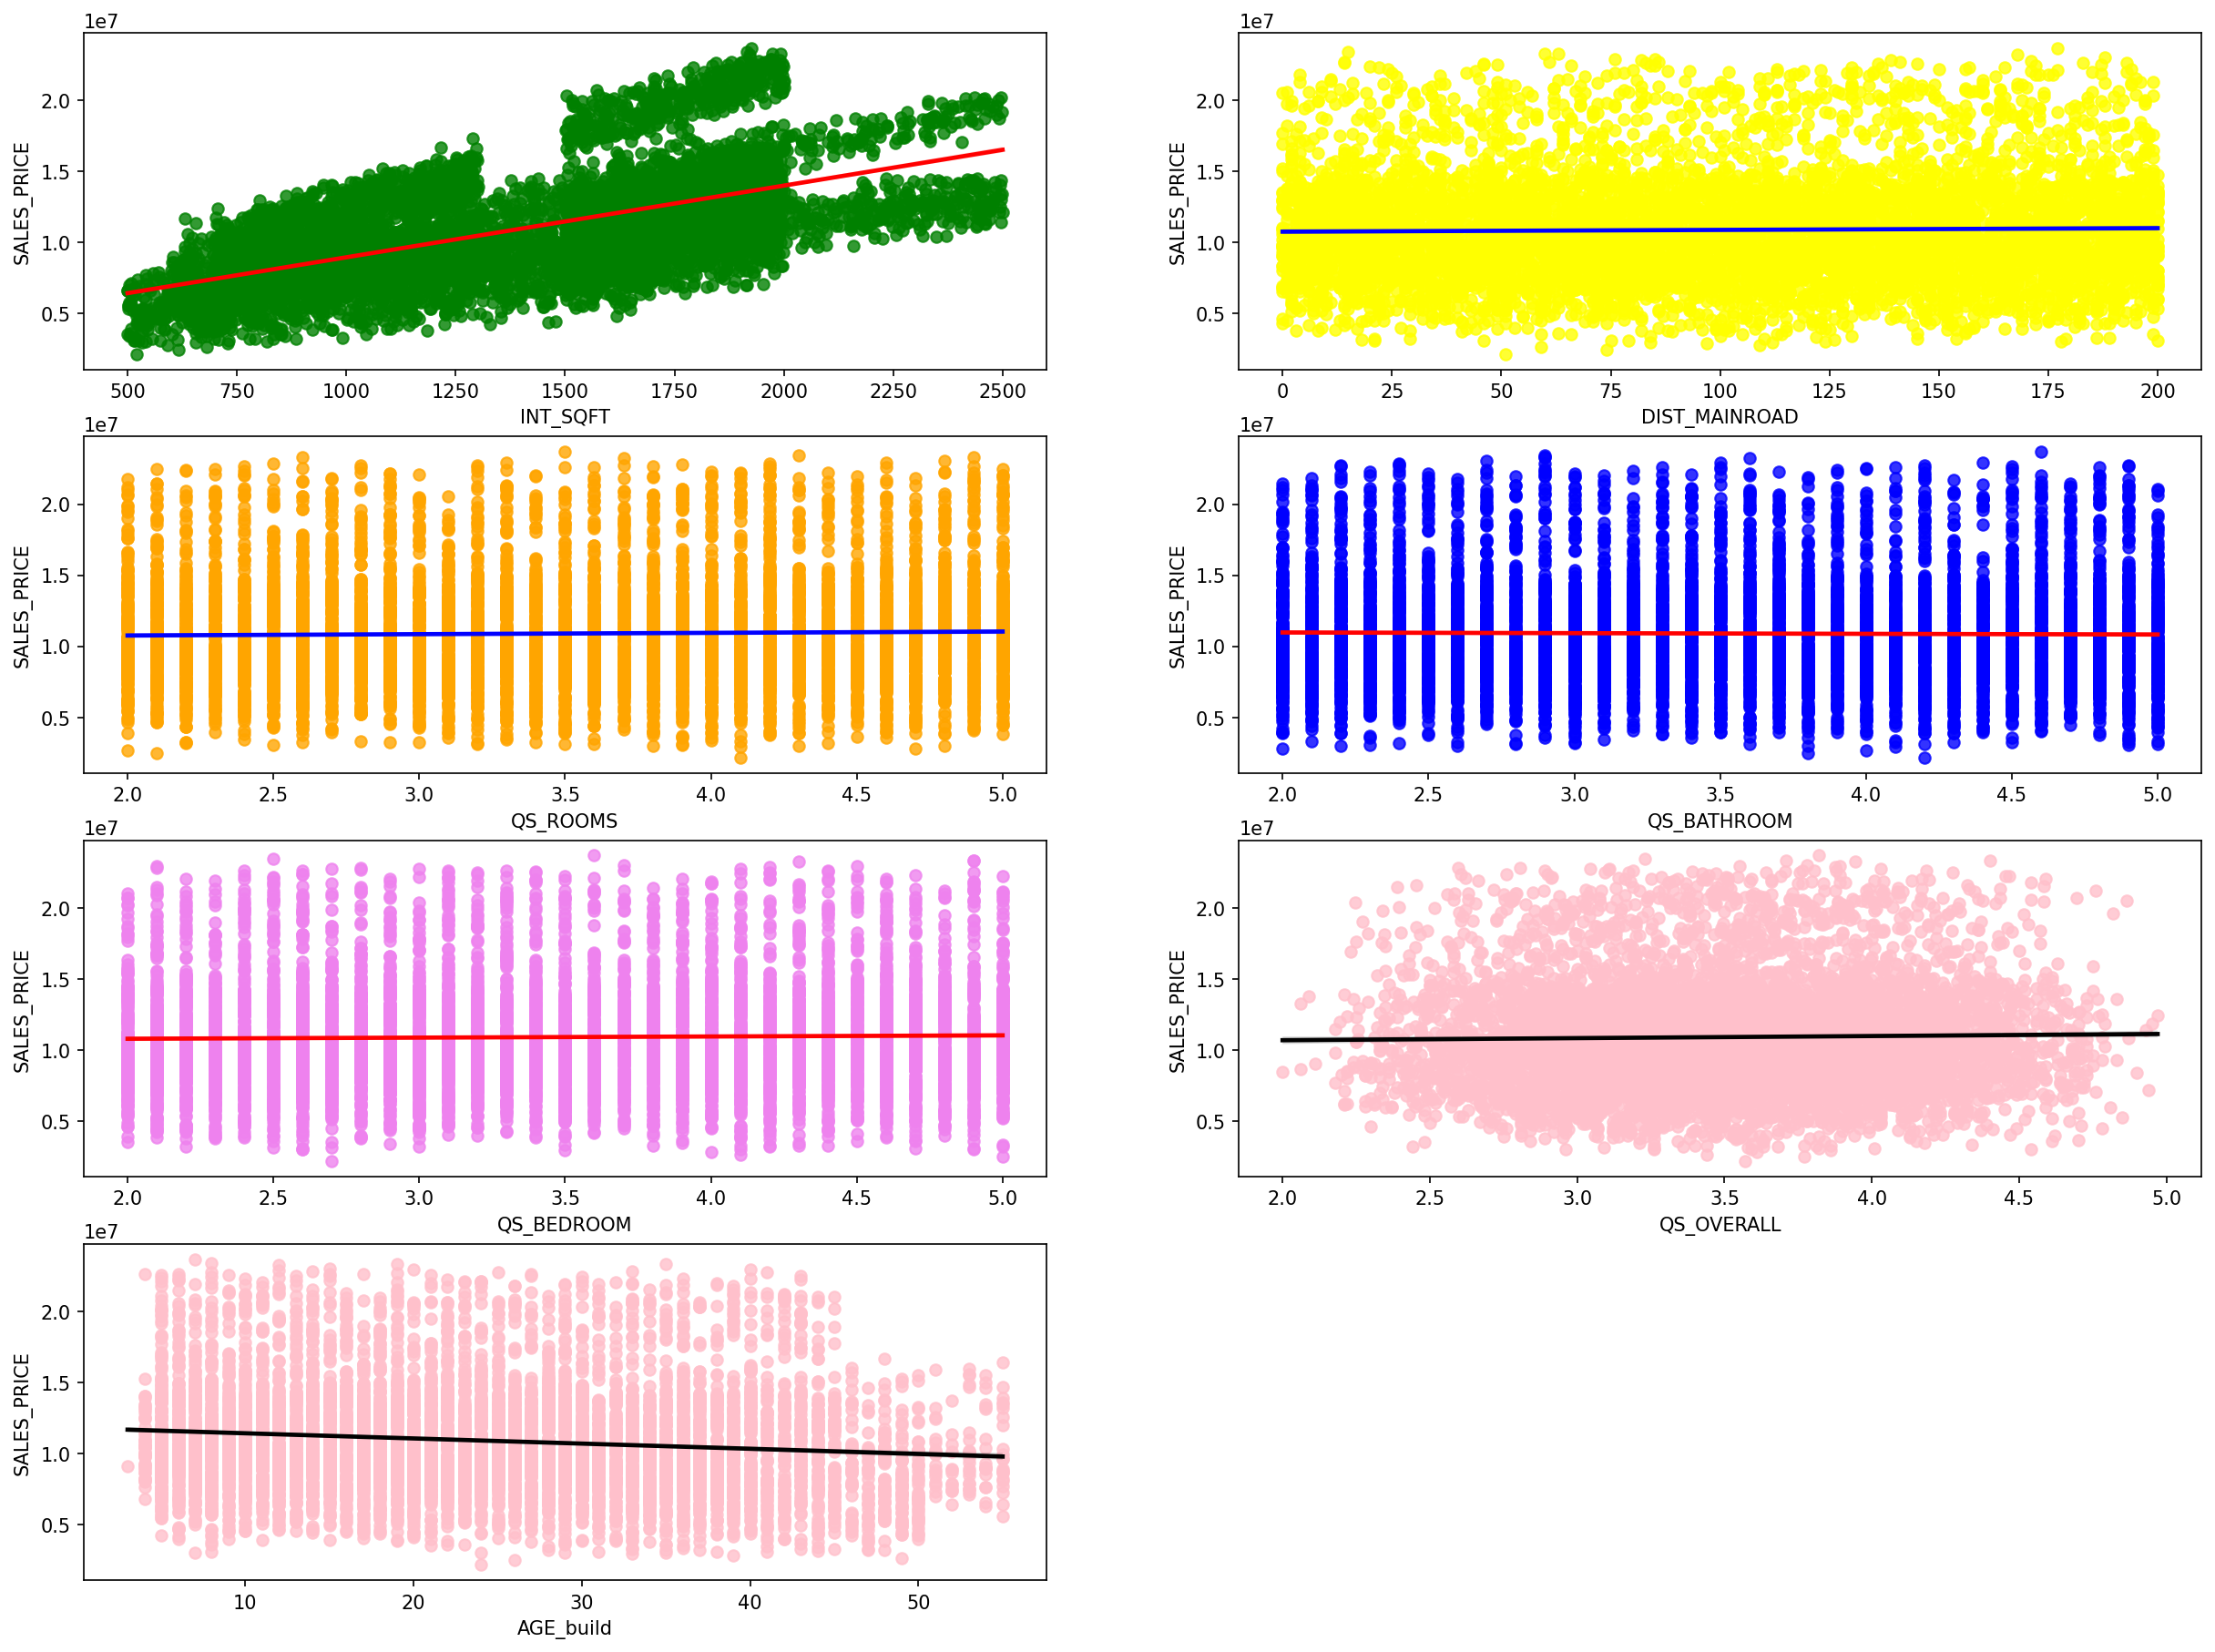

In [ ]:
plt.figure(figsize=(20,15),dpi=150)

plt.subplot(4,2,1)
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'green'},line_kws={'color':'red'})

plt.subplot(4,2,2)
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'yellow'},line_kws={'color':'blue'})

plt.subplot(4,2,3)
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'blue'})

plt.subplot(4,2,4)
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})

plt.subplot(4,2,5)
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'violet'},line_kws={'color':'red'})

plt.subplot(4,2,6)
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'pink'},line_kws={'color':'black'})

plt.subplot(4,2,7)
sns.regplot(x='AGE_build',y='SALES_PRICE',data=df,scatter_kws={'color':'pink'},line_kws={'color':'black'})

Insights from above plot


1.Plot INT_SQFT vs SALES_PRICE having strong linear relationship,if area increase price also increases.

2.AGE_BUILD vs SALE_PRICE shows negative linear relationship,if age of building is high price of the building falls accordingly.But we can't see strong correlation between them.

3.All the other plots showing low correlation, so those plots are not important features for training model,we can drop those.

Decsrete numerical variable

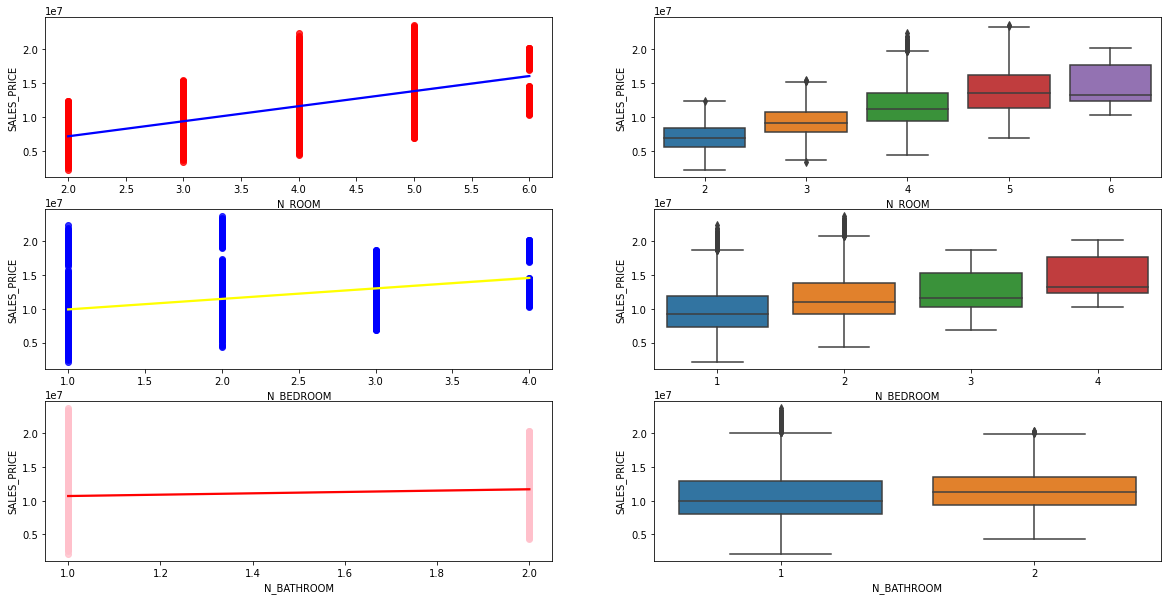

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
sns.regplot(x='N_ROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

plt.subplot(3,2,2)
sns.boxplot(x='N_ROOM',y='SALES_PRICE',data=df)

plt.subplot(3,2,3)
sns.regplot(x='N_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'blue'},line_kws={'color':'yellow'})

plt.subplot(3,2,4)
sns.boxplot(x='N_BEDROOM',y='SALES_PRICE',data=df)

plt.subplot(3,2,5)
sns.regplot(x='N_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'pink'},line_kws={'color':'red'})

plt.subplot(3,2,6)
sns.boxplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

Dropped unwanted columns those are not needed for prediction

Insights from above plot


N_BEDROOM,N_BATHROOM,N_ROOM has a strong linear correlation with sales_price.Hence these features will be important for training the machine learning model

In [ ]:
df.drop(["DATE_SALE","SALE_COND","DIST_MAINROAD","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace=True)

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_build
0,Karapakkam,1004,1,1,3,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,No,Other,NoSewa,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Other,All Pub,Gravel,C,7406250,30


In [ ]:
df.to_csv("cleaned.csv")

**ENCODING**

---



LABEL ENCODING

In [ ]:

df.AREA = df.AREA.map({'Karapakkam': 0,
                           'Adyar': 1, 
                           'Chrompet' : 2,
                           'Velachery' : 3,
                           'KK Nagar' : 4, 
                           'Anna Nagar' : 5,
                           'T Nagar' : 6})
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1,
                                       'No':0})
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO' : 0, 
                                             'NoSewa' : 1, 
                                             'All Pub' : 2})
df.STREET = df.STREET.map({'No Access' : 0,
                               'Paved' : 1, 
                               'Gravel' : 2})
df.MZZONE = df.MZZONE.map({'A': 0,
                               'C' : 1,
                               'I' : 2,
                               'RH' :4 ,
                               'RL' : 5,
                               'RM' : 6})

ONEHOT ENCODING

In [ ]:
df = pd.get_dummies(df,columns=['BUILDTYPE'])

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE_build',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],
      dtype='object')

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE_build',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],
      dtype='object')

**Splitting**

---



In [ ]:
X = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_test

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE_build,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
3913,2,1029,1,1,3,1,0,2,5,29,1,0,0
2726,4,2006,3,2,5,1,2,1,5,6,0,0,1
6220,6,1579,1,1,4,1,2,2,5,43,1,0,0
2716,0,718,1,1,2,1,1,0,1,25,0,0,1
5459,2,1216,2,1,4,0,0,2,5,35,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,1,691,1,1,2,1,0,2,2,27,1,0,0
3010,0,1220,1,1,3,1,1,0,0,10,0,0,1
66,3,1579,2,1,4,1,0,1,2,24,1,0,0
1642,5,1650,1,1,4,0,1,0,4,29,1,0,0


*Scaling*

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Model Fitting**

**LINEAR REGRESSION**

In [ ]:
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train) 
y_pred = regressor.predict(X_test_scaled)
y_pred

array([14016013.49740187, 13188038.12122256, 18696844.6800187 , ...,
       13691198.81855931, 15879667.03364362,  8402854.35046045])

*EVALUATION*

In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9213639272367697


**KNN**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))



K value  :  1  train score :  0.9999971935151961  score :  0.9339015299603963
K value  :  2  train score :  0.9842805351606609  score :  0.9467675890847053
K value  :  3  train score :  0.9773480571229648  score :  0.951366163653778
K value  :  4  train score :  0.9737265721031885  score :  0.9521271815642735
K value  :  5  train score :  0.970707933977236  score :  0.9522303595598108
K value  :  6  train score :  0.9678429646979989  score :  0.9514157798275111
K value  :  7  train score :  0.9654354226258076  score :  0.9507678473901973
K value  :  8  train score :  0.9637931946980894  score :  0.9499369201160028
K value  :  9  train score :  0.9618004919569207  score :  0.9488629672455469
K value  :  10  train score :  0.9602608897452792  score :  0.9479169876186173
K value  :  20  train score :  0.9489583649936241  score :  0.9403817346078593
K value  :  50  train score :  0.9249610530663257  score :  0.917340756291494


In [ ]:
knn = KNeighborsRegressor(5)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9555133395660271

**DECISSION TREE**

In [ ]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train_scaled, y_train) 
y_pred = dt.predict(X_test_scaled)
y_pred
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.9146638411022208


***RANDOM FOREST***

In [ ]:
rf = RandomForestRegressor(n_estimators= 10)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled) 
y_pred
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.9875831398432177


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [ ]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8731934305438374


**XGBOOST**

In [ ]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))


Learning rate :  0.01  Train score :  -0.3757160751350299  Cross-Val score :  -0.382646343858797
Learning rate :  0.02  Train score :  0.7468745062209117  Cross-Val score :  0.7438225429743233
Learning rate :  0.03  Train score :  0.925212465932328  Cross-Val score :  0.9226742465309423
Learning rate :  0.04  Train score :  0.9624971443007466  Cross-Val score :  0.9603611102618685
Learning rate :  0.05  Train score :  0.9746840261075183  Cross-Val score :  0.9725388673523019
Learning rate :  0.06  Train score :  0.9801171671727441  Cross-Val score :  0.9786933121486314
Learning rate :  0.07  Train score :  0.9846280002808633  Cross-Val score :  0.9829862827171366
Learning rate :  0.08  Train score :  0.9875312580880377  Cross-Val score :  0.9857477736605377
Learning rate :  0.09  Train score :  0.9893372842486684  Cross-Val score :  0.9879775019075785
Learning rate :  0.1  Train score :  0.9908311437257883  Cross-Val score :  0.9893651687849138
Learning rate :  0.11  Train score :  0.9

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled, y_test)

[15:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9944764495918138

**Feature importance**

In [ ]:
model.feature_importances_

array([0.36317536, 0.03191512, 0.01163116, 0.01096365, 0.00085533,
       0.11601284, 0.00289966, 0.02133384, 0.0329406 , 0.00321209,
       0.38046992, 0.02106303, 0.00352733], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

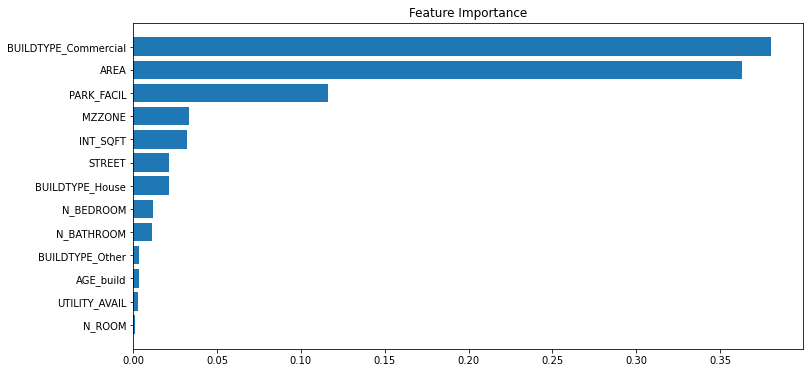

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Above plot shows some feature importance for buyers as wells sellers to be considered for thier business purpose



1.   **Build_type**:                             *Commertial* buildings plays important
factor.
2.   **Area**: According to the area, Sales price varies.

1.   **Parking facility**:Price of the building varies accortding to the parking facility.
2.   **Mzzone**:Price of the building depends upon the type of residency(A,I,C,RH,RL,RM)





**CONCLUSION**

After training several model it can be observed that **XGBOOST** models outperforms every other models with a R2-Score of 0.9944. So it can be concluded that **xgboost** model will provide best resullts in predicting the prices for this particular dataset. 

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 24.7 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 181 kB 63.6 MB/s 
     |████████████████████████████████| 235 kB 41.9 MB/s 
     |████████████████████████████████| 164 kB 61.4 MB/s 
     |████████████████████████████████| 4.7 MB 35.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=058c5bf10642a6baba67fa87501d76ae37dc9ed1b23de0a4d826037cd9862cd8
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
st.title("CHENNAI HOUSE PRICE PREDICTION")
import pandas as pd
df=pd.read_csv("/content/cleaned.csv")
#ENCODE
df["AREA"] = df["AREA"].map({'KARAPAKKAM':0, 'ANNA NAGAR':5, 'ADYAR':1, 'CHROMPET':2, 'KK NAGAR':4,'T NAGAR':6, 'VELACHERY':3})
df["PARK_FACIL"] = df["PARK_FACIL"].map({'No':0, 'Yes':1})
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].map({'AllPub':2, 'ELO':0,'NoSeWa':1})           
df["MZZONE"] = df["MZZONE"].map({'A':0, 'C':1, 'I':2, 'RH':3, 'RL':4, 'RM':5})   
df["STREET"] = df["STREET"].map({'No Access':0, 'Paved':1, 'Gravel':2})
df= pd.get_dummies(df,columns = ["BUILDTYPE"])
#SPLIT
train=list(df.columns)
train.remove('SALES_PRICE')
train.remove(train[0])
#Split my data
x_train, x_test, y_train, y_test = train_test_split(df[train].values,
                                                    df['SALES_PRICE'].values,
                                                    test_size=0.25,
                                                    random_state=1,
                                                    shuffle=True,
                                                    stratify=None)
#SCALE
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
# BEST MODEL
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
model = xgb.XGBRegressor(learning_rate = 0.8, n_estimators=100)
model.fit(x_train,y_train)
##STREMLIT CODE
q1,q2=st.columns(2)
q1.video("https://www.youtube.com/watch?v=5IvQ3fYKnfM")
q2.image("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAA2FBMVEX///8U6IXx8vInIyMAAAAA534A6IL08vQA53wA6IAcFxf28vUIAAAmISH78/jHx8d2dHRqhJlyip74+PhHRETm5uYVDw+amZmCgYHT2d8fGhq8xs9kgJbBytITDAzb8eWmtMDl8euUpbSdrbqn7saw7suFmara3+SwvMZw7qrM8NyI7LXD79Y96ZKzsrLk5OS879KT7btb6p4u6Y19k6VhX1/V1NTy/fdraWlWU1N566076pKf7cGdnJxr66bc+um4uLg5NjZQTU3s/fPQ+eLNzMyP7LmAfn7hNW4zAAAPQElEQVR4nO2da0PaPBTHofRKaRUQlPsdOi4OAZ0iOt2z6ff/Rk+SNm3SJlA2Abfm/2KDkpT258nJSXJSUikhISEhISEhISEhISEhISEhISEhISEhISEhISEhISGhv0k/++tFWkdSZ19u5v+d+oI+q77fzHTdUNW0J1U1FD29np76uj6fvk9UACodlarr65+nvrpPpflMZ4HyeS0Hp77CT6Ofy22oPFzCuqC+LXahcnE9n/pCP4HmSgxUUEb6+6mv9dSa6PFQQenzU1/tabWIsIIBg6IrisLoG/VE+/mFEWpqij5bbwbT8Xg6uHkGwYSwLV80K1VPT6aSbZumBmSatj2eqEqIVmL9FuWvDP15bJuaRAoQG6RpXOqpL/pEmhOsVH3dsWlSrkzzhnJrajIjiG8EBGXWYqKCsltp0tXriYxOFwEC/Y2LCjZGaUb6tuWpL/wEmgaGpU9tPipIyyZ7giTGD8ugDY7NraxgU5ypSTatgW9Y+m5WoCUm2mv5hqXPt7dBj1YraLWJ6xB/4ns31iFWGghGJRia0i7ffgviLX3X2UvX7z8yuWbm4vzpV/TT60uJU+/pshgUKvHP/0J8+HL5ddfl/KmesQ9a0m3QtKeTmaLryuN6TPeQJhFobHfx1xdyM1u1Mhmrmi3L8vkd/fGV3LTYFe/l3IX38lJuyjykqSfwIaZ6va3gBwkblj4miWh2P+1NLquGPmuRIM2Bb1pb2+FLNQc4AVBVyAsoKz9Qf/uLakZmW03TymAIP6qZ8iXvK8AXyPgvcJ7NyGd73frewjeuLshGaLaW5NhGpd2ZHXxi8M98KwNE1aZc/nF7e9GUc1mAqyqT931h8WCVA1hPzYyV43zFSy5jZfEbACt3YFhfVIZh2fPwlKk+IGzL3PjBFnc4LWWykM2PF69lSGfnchngkt+DMrFgFeVMJvfC/hJgms0n/OYIsLDtPBKmY86j84B6K4CpdfzPeU5LylYzmeYr5aSKV8DWLDk4EAtW6iqbqV4wS90Bjn6xI8DCw0JjY7JYEC1xRtAMIlPjjX3eDGAlX4WPfn3NyefB23iwShDJHasUwJN9J98dGBYOHEjDoYL0wLTmQQnzBrdD9QvztPegxcnXjA+uyYPxYKVuq5nsOaMQbKBy0GMcHpbv3wO70cbMyXiyB9Cm2P2rM9ZZz6Cf4XZhvmLC+kW1tkDA9VcfgreHh+WZCEnCXIenkD3T6hBdgM+TOTzMWNRt8BQTVurVIvx4IMuiYoXDw5q4Lc5YBy7LXjJZpZU+swzjpNc5YAox4sO4sMD5rGj0CszXyhDvDw9r7cG6MRlWE2qHXwLrs/24nzW5DCyhHHHuDMWFlYLtMMLhAcQNpAc8PCwvzCI7Q1Zf6LY4oqm++U01es6vcjzDig/rshxt1qiTJA+cBBbPstI6EYn1FT6skOPlKzYsCYIJlbwqh8z3eLCIZmgrPFhBeKHNt8C6rzL9cVSxYaXus5GGHeF3PFgxHDw5ItLGW2BVLU4QGVZ8WHfhNgedfvWWOnI0WGToYH/h5IcoBCx/BpAROsR1WXvAgqPAHBXkgk5EpmfIjtYbUs57wGmHMWFJEStIXb5f+Xp/8Q/vAQvOL7wS74GpUe9Tx4RFOG+uh48JK9JNpd7lLKHAIPaAhY4QbRs4sVxoOHWEoNSI+CPJnrBDeGX6m5Z1W7awMhliKm8fWCB6IAaI4Dsik1xHG+7QUanEdlokLDx+VB8jpyxGfNbX12bZFZy4+T1Y9FkBusj06eFh4Wk8ej6LPZRWgnkHfyTNgJXK8aZUgO5yJCzutHIUFmRR9gOSrBXtQ44Hi5qjkcwpK7mUCYsx6/AjNA4hdUbCAgVl9oJMtI+A4wJ/Chm4++ikzeFh9f2JKWohzOwsornwxtyMBYt2L7QoWLcgHmAskKWYsCBaDANSjtjuEWHRMzCSZrcmMx3mSAZJkkpMWGesW8WfkbCushwTBB2qFZlJBqet/kCvgJExJpqPMPnnw6KXd9ASq9kaT6fTzUzfDxa0i3C/jkXBum5yTJDZzOAsmdtqAWTGEsbxZkrToQUcjwnKkrS9bAhlEBMWGONSM02EKFhwEMNc5XpnmhwYoGfRAJHwXoSOCov28aRsd7UnNiwYlnKG0hQs2G8yV7kYkwz4cAoZJOvsh4c1p4Y2HR4tNNcXGxY0LU70QMMC7Sk8aIGC01esxS9wWmhwGctiTckfGZaa7rBzjkxULD4sGAdZOVYI9YuCBacJm5GFDTR5+MKoXEIDwl8yuQAW6Aiw6JzadItJyx3dMGEtmKeF3siSo2HBXYZeezhnLJlJVYu3qnoLQ4Z7TnR2vHXDwMuzckrd6as9YKWuEa0rurWUzmH6A9k+i2UrvBh71rQyvFgVGFX1IcuZhz0+rLS+6ERT2txF1X1gAVrgnsvylU+m+HIro/QHypC+omLZJ6/JFs8eEM8XzllfLbTUzWRyAlhpVZ9E8uA1NdwbjnfBSt01YR5IWW7eXl0+XZ6/yrkqNLaLkCe7k+Hhslx+OD+/x4VeeCeFi2y8sOQUsNAOizmISDVMTLOfjf1hpYrvKG0G5rGVy1kLJRxlXiLFpAeICxZDaW+gY3jdksAHM744Ae/hYX1nL9UrymIzbUk20thLficH0v4UDR8W8FFXslx2E9msajkn37Lv5QzmB7qlsk35lTcGR7qUq1nOUOpJzh44848NC1IwFF030svlUtGjKVz+5N9WWEC/Lm8tGch6uDpjxEaeStfnF6BQ7uL+aVda6OXFLa/I032sZZLfFxcWQ8TUcwArSfnK/+2EpRqGAeceDH1CpHCNBSxGU1wu1m+bfr+/uSHTSv1FVgHLxaDoi80Y7dB0RYYTfjYbJ5nt39Q33rKXsp5q4e0CgfzkQAErrSz72tatdP5KWOJhGemBvX3HE5GelSRYqSgs0Ovt2BxGLJUlG5aaHu/aG6Z1gnWfRMMyZtKuPYdmZylgIVYLbgeIzcoeq8SCYoJhqbPtZqWZducLXWN96hs4pmjLkqJ2pZnwiSGuOoPwQ6OSCyuyFgYtadp/Wz8jzVQ98tCoZMEiUrGUm9CatN16W+pgCG2ortJRJQsWceNLm0Y1XUSebSRg4UY4p/b2duI90+43YJVW3I96jT+4lcMryOOmDMuecp9pZ8DnvPq7wpiw2qNtX1mpc+dMh+0/vJ3DyodF7mNi7mX16Cg3LdPsDLxH+LBh5WvbvrKS/1thPWIDIvOVyQddhLRE62QgnnCf9sOGVfhHYfkTU2R6lr3ktUE/5U3TuJZVclZdx0Hep9IddrEbGvWGQ0eDB/OpETheoSo1usNeCcOqBB83ul1nFBRxX7YlUKSSqnh/k1GNXwl+7Lj/S2333+Gw7S5e1kbU5/FhkVudiG1MYX8VJFOaKGlQnTBg9VbDXg/eQC/vVGqFoXuD9V6jtsqD26kUGgWn0c0T11hc5Z2GU2900f2AjypOvgtf9gq1Rq/eQ0UKjUq7DisV6xWnPqykHM9Eh11UqQYq9ehKLrq6y6ZdQG+6jUYXnSa1cq+gVtgXlkImwvN270RT4VmwQDN0ramRh1dZLMBrquXRn7Fdg7AQvnY+WOUbroqIB7p8B30gQccnofuU4D9d1IdW6vA0hd4KFim6vrEEjzkFeKSUb+BKWnD2AvoTIE86qjdcfvC/4e/C0juBx2JndlOtUPL2JXJgue2j4HjMUpTPr7jcpLzfEEvuEfA/vK28i9opwAOVUJEutKJCwSXRXuF/i7jSiqzkqYEsELnKVdc91Cv8CSyF2Lyz4cai5L5zZFnGFliABio5AgY2IswIO/i8H1QhnFDQskb5EapWgVW6+V7FK4L+TEUHkW+7xSVoU0XIBldCXEAlOnZB1zPsEX8geE2/D4uIsuw1z72rz+Ed+NtglQpYEtUDRmHVMCzosyq4FmqajWEdObcaPjoka0I7Q/fKruSfHxopbJzYPgG10W/AWjBgLXiwiNQQz/62WxbRI+WD7JkdllXK0xkLxUahSxRBNXE7G9Ul98tG0Uo94h34KmeY8qwwhcvv7eD3g0U+rwaV2gYrtSKu13OyUFFYkvdyhEoVwl15pQ5bHOGIAqe0ckbu2fKsSr6AK3PrDN2u2e0uhq4D6+4NS42xO9MgFvC9fedsWJ4brbhdj9NFrxFA2G6isECMAY2wVEANo+FyaQPUNVQJunrQeaKuddigYFVWbrSBK/XaVCWsYr7nvi25EYWDOtUaOk+twB+rhoQXtcjd4jwHr0hEITcpnA2rkV91e+gOVk67UECtsVZftXt52OXjsWGdGDV368P2sC65QWmtPoTVStAV5dtO1+NQ7zq9+rCI4iy/YgG3PxB5Od75iUpYbWyulXyh1y54tIf5bnvVrZEtfKv8R0K1oslXYVbkFn2vrbJhgaDYQT5KqrXbGAl8ja6x6B1pSFSNdq2YqpToouDmnJ4j+UW8uLwR9BajoC07rEq4WB2/LzbAJeH6DVhFCkUafOGNmKTvtpmsqOcc4SchcWB9Og17u8vsFm5y5P57c8AyLZWcoMe7Xf8GWJVVb1XgZ9LtIX8uhpzOssNPh09HJui90aNx8xEXcVgVG07tQ1gFyQ4UDG0WoqUa1HYCfxu1sfmQq/hbhAfNxoSaKZ2Q8++qvqA2qgTPblOS9YMD/iN4yMAA0OpM0ugXsFT46M05nYAUhK0J+70BPwXXoFfCNNNubZ5nj7PnTSuUgWT3g8cxn/ryj6zg2crhHXSauxQdTn8gJp05m8L+XQV7yme7ko1cVsRzu/+GzvBjFTx0dBKDliYRE/QJc1mp4Kkh4N5vdtLSpEdymH3qaz++giBB32VbVCZb0qIsJGJ0oyy2Zv7Z9I+vJa0vRCJm+1SVuZfVNStpTQ0a/4aB4cfrGzm40R+nzN0Cpj1Q6UFQIg0rtEdT1ZebToiXZmv9ZWjpNYm/JIMUmpQBI5zN2Mb7dmxbmq+V8Cr1rq2G/7D6oSksMCJUZuub/mDQv/nyGM2PTKvJ+9GdQIwJPzCGNuBOQ2Z+pPrt1Fd8Sn1nQuFITSeaFfqx37islKQNoBkaKDszbpFZ6YkMsCKaxEhQ1meJGz5z9G3C6PkIwWnTU1/jZ9JgFn04omtThp5+E1YV0n/9haIrRrCnAgYRur7YCFJsfR9Mnh9VHUl9XEwGAtRufUt4QCUkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJPSx+h+fgWwZVwIDXwAAAABJRU5ErkJggg==")
f1=st.selectbox("SELECT AREA",['KARAPAKKAM','ANNA NAGAR', 'ADYAR', 'CHROMPET', 'KK NAGAR', 'T NAGAR','VELACHERY'])
f11q={'KARAPAKKAM': 0, 'ANNA NAGAR': 5, 'ADYAR': 1, 'CHROMPET': 2, 'KK NAGAR': 4, 'T NAGAR': 6, 'VELACHERY': 3}
q = pd.DataFrame(
    [[12.9191,80.2300],
     [13.0012,80.2565],
     [12.9516,80.1462],
     [13.0410,80.1994],
     [13.0418,80.2341],
     [13.0850,80.2101],
     [12.9815, 80.2180]],
    columns=['lat', 'lon'])
st.map(q.loc[[f11q.get(f1)]])
f2=st.number_input("ENTER AREA IN SQFT")
c1,c2=st.columns(2)
f3=c1.radio("NO OF BEDROOM",[1,2,3,4])
f4=c2.radio("NO OF BATHROOM",[1,2])
f5=st.slider("NO OF ROOM",min_value=1,max_value=6,step=1)
f6=st.radio("PARKING FACILTY AVAILABILITY",["YES","NO"])
f7=st.date_input("SELECT DATE OF BUILD")
f8=st.selectbox("UTILITY AVAILABILITY",['AllPub', 'ELO', 'NoSeWa'])
f9=st.selectbox("MZZONE",['A', 'C', 'I', 'RH', 'RL', 'RM'])
f10=st.selectbox("STREET",['No Access', 'Paved', 'Gravel'])
f11=st.selectbox("BUILDING TYPE",['Commercial', 'HOUSE', 'OTHERS'])
f81={'AllPub': 2, 'ELO': 0, 'NoSeWa': 1}
f91={'A': 0, 'C': 1, 'I': 2, 'RH': 3, 'RL': 4, 'RM': 5}
f101={'No Access':0,'Paved':1, 'Gravel':2}
f111={'Commercial':2, 'House':0, 'Others':1}
st.checkbox("I ACCEPT TERMS AND CONDITIONS ")
if st.button("CLICK HERE TO PREDICT THE REAL PRICE VALUE"):
    st.header(*model.predict([[f11q.get(f1),
                           f2,
                           f3,
                           f4,
                           f5,
                           0 if f6=="NO" else 1,
                           (pd.Timestamp.today().date()-f7).days,
                           f81.get(f8),
                           f91.get(f9),
                           f101.get(f10),
                           1 if f111.get(f11)==2 else 0,
                           1 if f111.get(f11)==0 else 0,
                           1 if f111.get(f11)==1 else 0]]))
    st.write("THE PREDICTED PRICE OF THE XGBOOST MODEL.... ")
    st.markdown(':moon:')
    st.balloons()

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-10-02 15:38:21.672 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[#######...........] \ extract:localtunnel: verb lock using /root/.npm/_locks/s


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.245.135.145:8501

npx: installed 22 in 3.014s
your url is: https://dry-mammals-rest-35-245-135-145.loca.lt
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
[15:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg: